In [77]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage, BaseMessage
from typing import TypedDict, Annotated, Literal
from pydantic import Field, BaseModel
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

load_dotenv()


True

In [78]:
def get_gemini_model(model_name: str = "gemini-2.5-flash"):
    model = ChatGoogleGenerativeAI(
        google_api_key=os.getenv("GOOGLE_API_KEY"),
        model=model_name,
        temperature=0,
    )
    return model

In [79]:
class ChatState(TypedDict):
    chat_history: Annotated[list[BaseMessage], add_messages]

In [80]:
llm = get_gemini_model("gemini-2.5-flash-lite")

In [81]:
def chat_node(state: ChatState) -> ChatState:
    messages = state["chat_history"]
    response = llm.invoke(messages)
    return {"chat_history": [response]}


# def chat_end(state: ChatState):
#     if

In [82]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

graph.add_node("chat_node", chat_node)

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)
# graph.add_conditional_edge("chat_node", chat_end, {})

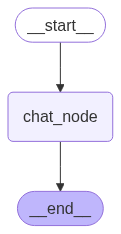

In [83]:
workflow = graph.compile(checkpointer=checkpointer)
workflow

In [92]:
response = workflow.invoke(
    {"chat_history": [HumanMessage(content="What is the capital of India?")]},
    config ={"configurable": {"thread_id": "1"}}
)

In [85]:
response

{'chat_history': [HumanMessage(content='What is the capital of India?', additional_kwargs={}, response_metadata={}, id='d192babb-33c6-48a9-bb09-fce6b6d0926a'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--2e5a9fe0-60e4-41b6-ac90-ef299ba04dca-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}}),
  HumanMessage(content='Hi my name is Amey', additional_kwargs={}, response_metadata={}, id='b4fd2c90-2f6f-4e45-90cd-b5cb4f795c64'),
  AIMessage(content="Hi Amey! It's nice to meet you. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--43531e

In [86]:
chat = []
chat.append(
    SystemMessage(
        content="You are a helpful QA assistant bot. Answer in one sentence using simple language keeping the answer as short as possible."
    )
)
while True:
    user_input = input("You: ")
    chat.append(HumanMessage(content=user_input))
    print(f"You: {user_input}")
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Exiting the chat. Goodbye!")
        chat = []
        break
    response = workflow.invoke({"chat_history": chat})
    ai_message = response["chat_history"][-1]
    chat.append(ai_message)
    print(f"AI: {ai_message.content}")

You: hi


ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [73]:
thread_id = "1"

config = {"configurable": {"thread_id": thread_id}}

response = workflow.invoke(
    {"chat_history": [HumanMessage(content="Hi my name is Amey")]}, config=config
)

response2 = workflow.invoke(
    {"chat_history": [HumanMessage(content="What is my name?")]}, config=config
)

In [74]:
response

{'chat_history': [HumanMessage(content='What is the capital of India?', additional_kwargs={}, response_metadata={}, id='d192babb-33c6-48a9-bb09-fce6b6d0926a'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--2e5a9fe0-60e4-41b6-ac90-ef299ba04dca-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}}),
  HumanMessage(content='Hi my name is Amey', additional_kwargs={}, response_metadata={}, id='b4fd2c90-2f6f-4e45-90cd-b5cb4f795c64'),
  AIMessage(content="Hi Amey! It's nice to meet you. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--43531e

In [75]:
response2

{'chat_history': [HumanMessage(content='What is the capital of India?', additional_kwargs={}, response_metadata={}, id='d192babb-33c6-48a9-bb09-fce6b6d0926a'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--2e5a9fe0-60e4-41b6-ac90-ef299ba04dca-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}}),
  HumanMessage(content='Hi my name is Amey', additional_kwargs={}, response_metadata={}, id='b4fd2c90-2f6f-4e45-90cd-b5cb4f795c64'),
  AIMessage(content="Hi Amey! It's nice to meet you. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--43531e

In [76]:
workflow.get_state(config)

StateSnapshot(values={'chat_history': [HumanMessage(content='What is the capital of India?', additional_kwargs={}, response_metadata={}, id='d192babb-33c6-48a9-bb09-fce6b6d0926a'), AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--2e5a9fe0-60e4-41b6-ac90-ef299ba04dca-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='Hi my name is Amey', additional_kwargs={}, response_metadata={}, id='b4fd2c90-2f6f-4e45-90cd-b5cb4f795c64'), AIMessage(content="Hi Amey! It's nice to meet you. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, 